In [2]:
from PIL import Image
import os
import sys
import math
import matplotlib.pyplot as plt
from ast import literal_eval

In [1]:
def get_gc_map(file_name: str, group_constant_range: list = [10+i for i in range(20)]) -> dict:
    img = Image.open(file_name)

    with open(file_name, "rb") as image:
        f = image.read()
        b = bytearray(f)
        binary = ''.join(format(ord(i), '08b') for i in str(b))
    binary_length = len(binary)
    gc_map = dict()
    
    for group_constant in group_constant_range:
        bin_list = list()
        sub_list = list()
        n = 0
        for i in binary:
            if len(sub_list) < group_constant:
                sub_list.append(i)
            else:
                bin_list.append(str(sub_list))
                sub_list = list()
            gc_map[group_constant] = len(set(bin_list))
            
            pr = f"{math.ceil((n/binary_length)*100)}%   [GC {group_constant}]"
            sys.stdout.write('\r'+pr)
            n+=1
        print(f"GROUP CONSTANT {group_constant} Calculation Complete")
    return gc_map

In [2]:
def get_bn_len(file_name: str) -> int:
    with open(file_name, "rb") as image:
        f = image.read()
        b = bytearray(f)
        binary = ''.join(format(ord(i), '08b') for i in str(b))
    binary_length = len(binary)
    return binary_length

In [8]:
gc_map = get_gc_map("cat.jpeg")

100%   [GC 10]GROUP CONSTANT 10 Calculation Complete
100%   [GC 11]GROUP CONSTANT 11 Calculation Complete
100%   [GC 12]GROUP CONSTANT 12 Calculation Complete
100%   [GC 13]GROUP CONSTANT 13 Calculation Complete
100%   [GC 14]GROUP CONSTANT 14 Calculation Complete
100%   [GC 15]GROUP CONSTANT 15 Calculation Complete
100%   [GC 16]GROUP CONSTANT 16 Calculation Complete
100%   [GC 17]GROUP CONSTANT 17 Calculation Complete
100%   [GC 18]GROUP CONSTANT 18 Calculation Complete
100%   [GC 19]GROUP CONSTANT 19 Calculation Complete
100%   [GC 20]GROUP CONSTANT 20 Calculation Complete
100%   [GC 21]GROUP CONSTANT 21 Calculation Complete
100%   [GC 22]GROUP CONSTANT 22 Calculation Complete
100%   [GC 23]GROUP CONSTANT 23 Calculation Complete
100%   [GC 24]GROUP CONSTANT 24 Calculation Complete
100%   [GC 25]GROUP CONSTANT 25 Calculation Complete
100%   [GC 26]GROUP CONSTANT 26 Calculation Complete
100%   [GC 27]GROUP CONSTANT 27 Calculation Complete
100%   [GC 28]GROUP CONSTANT 28 Calculation Co

In [9]:
gc_map

{10: 797,
 11: 618,
 12: 1542,
 13: 1417,
 14: 2206,
 15: 978,
 16: 2577,
 17: 2115,
 18: 2814,
 19: 1788,
 20: 2988,
 21: 2400,
 22: 3064,
 23: 1570,
 24: 3244,
 25: 2662,
 26: 3414,
 27: 2266,
 28: 3654,
 29: 3059}

In [10]:
def count_chr_from_gc(gc_map: dict) -> int:
    chr_cnt_map = dict()
    for gc, noc in gc_map.items():
        gc_bin = bin(gc)
        chr_cnt = len(str(gc_bin)) + noc*(gc + 2*math.ceil(math.log(noc)/math.log(2)) + 2) - 1
        chr_cnt_map[gc] = chr_cnt
    return chr_cnt_map

In [11]:
chr_cnt_map = count_chr_from_gc(gc_map)
chr_cnt_map

{10: 25509,
 11: 20399,
 12: 55517,
 13: 52434,
 14: 88245,
 15: 36191,
 16: 108240,
 17: 90951,
 18: 123822,
 19: 76890,
 20: 137454,
 21: 112806,
 22: 147078,
 23: 73796,
 24: 162206,
 25: 135768,
 26: 177534,
 27: 120104,
 28: 197322,
 29: 168251}

In [18]:
binary_length = get_bn_len("cat.jpeg")
binary_length

151792

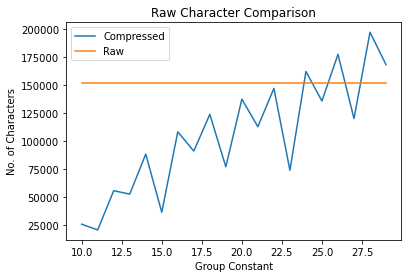

In [26]:
gc_list = [i for i in chr_cnt_map.keys()]
chr_list = [i for i in chr_cnt_map.values()]
raw_bn_list = [binary_length for i in chr_cnt_map.keys()]
plt.title("Raw Character Comparison")
plt.plot(gc_list, chr_list)
plt.plot(gc_list, raw_bn_list)
plt.legend(["Compressed", "Raw"])
plt.xlabel("Group Constant")
plt.ylabel("No. of Characters")

plt.show()

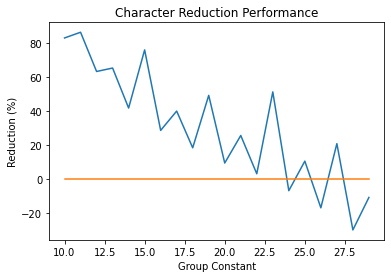

In [40]:
gc_list = [i for i in chr_cnt_map.keys()]
chr_list = [i for i in chr_cnt_map.values()]
raw_bn_list = [binary_length for i in chr_cnt_map.keys()]
percentage_list = [100-(i/j)*100 for i, j in zip(chr_list, raw_bn_list)]
zeros_list = [0 for i in chr_cnt_map.keys()]

plt.title("Character Reduction Performance")
plt.plot(gc_list, percentage_list)
plt.plot(gc_list, zeros_list)
plt.xlabel("Group Constant")
plt.ylabel("Reduction (%)")

plt.show()

In [3]:
def compress_binary(binary_str: str, group_len: int) -> str:
    #grouped binary_str
    group_list=list()

    #temporarily contains the group
    group_temp=str()

    #key:group
    #value:how much they are repeated
    group_repeatance=dict()
    enc_list = list()
    leftover=str()
    #fills group_list
    for k in range(len(binary_str)):
        group_temp+=binary_str[k]
        if k % group_len==group_len-1:
            group_list.append(group_temp)
            group_temp=""
    if len(binary_str)%group_len!=0:
        for i in range(len(binary_str)%group_len):
            leftover=binary_str[-i]+leftover

    
    #group_repeatance is filled
    for k in group_list:
        if k not in group_repeatance.keys():
            group_repeatance[k]=1
        else:
            group_repeatance[k]+=1
    
    #key_dict is filled
    key_dict=sorted(group_repeatance.items(), key= lambda group: group[1], reverse=True)
    key_dict=dict(key_dict)
    k=0
    for i in list(key_dict.keys()):
        temp=list(bin(k))
        del temp[1]
        del temp[0]
        compress_code=str()
        for j in temp:
            compress_code+=j

        key_dict.update({i:str(compress_code)})
        k+=1
    key_dict[leftover]=str(bin(k))[2:]
    #binary_str is compressed
    compressed_binary_str=str()
    for i in group_list:
        compressed_binary_str+=key_dict.get(i)
        enc_list.append(key_dict.get(i))
        if i is not group_list[-1]:
            compressed_binary_str+=" "
    enc_list.append(leftover)
    compressed_binary_str+= " " + leftover

    return key_dict, compressed_binary_str, group_repeatance, enc_list

In [13]:
bn_str = "0000011001101110000100101010100101010100101010101010010101010100101010100101010101"

In [14]:
key_dict, cbs, gr, enc_list= compress_binary(bn_str, 10)

In [92]:
key_dict

{'1001010101': '0',
 '0000011001': '1',
 '1011100001': '10',
 '0010101010': '11',
 '0101010100': '100',
 '1010101010': '101',
 '0100101010': '110',
 '10': '111'}

In [15]:
enc_list

['1', '10', '11', '100', '101', '0', '110', '0', '10']

In [16]:
cbs

'1 10 11 100 101 0 110 0 10'

In [7]:
key_file = str()
gc = str(bin(3)[2:]) + " "
key_val = str()
for i, j in key_dict.items():
    if i is not list(key_dict.keys())[-1]:
        key_val += f"{i}{j} "
    else:
        key_val += f"{i}{j}"
key_file += (gc+key_val)
key_file

'11 10010101010 00000110011 101110000110 001010101011 0101010100100 1010101010101 0100101010110 10111'

In [8]:
len(key_file)

100

In [4]:
img = Image.open("yujin.bmp")
with open("yujin.bmp", "rb") as image:
    f = image.read()
    b = bytearray(f)
    bn_str = ''.join(format(ord(i), '08b') for i in str(b))

In [5]:
def to_comp_bn(bn_str, gc):
    key_dict, cbs, gr, enc_list = compress_binary(bn_str, gc)
    key_file = str()
    gc = str(bin(3)[2:]) + " "
    key_val = str()
    for i, j in key_dict.items():
        if i is not list(key_dict.keys())[-1]:
            key_val += f"{i}{j} "
        else:
            key_val += f"{i}{j}"
    key_file += (gc+key_val)
    return key_file, cbs, enc_list

In [26]:
key_file, cbs, enc_list = to_comp_bn(bn_str, 12)

In [27]:
len(key_file) + len(cbs)

20414721

In [28]:
len(bn_str)

50334408

In [22]:
for gc in range(30, 40):
    key_file, cbs = to_comp_bn(bn_str, gc)
    ratio = str(((len(key_file) + len(cbs))/len(bn_str))*100) + " %"
    out = f"GC: {gc}\nLength: {len(key_file) + len(cbs)}\nRatio: {ratio}\n"
    print(out)

In [ ]:
key_file, cbs = to_comp_bn(bn_str, gc)

In [6]:
def create_file(bn_str, gc):
    path = os.getcwd() + "/" + "extracted_file
    os.mkdir(path)
    key_file, encrypted, enc_list = to_comp_bn(bn_str, gc)
    key_list = key_file.split(" ")
    for i in key_list:
        with open(f"{path}/k{key_list.index(i)}.txt", "w") as f:
            f.write(i)
    for i in enc_list:
        with open(f"{path}/{enc_list.index(i)}.txt", "w") as f:
            f.write(i)
    
            

In [7]:
create_file(bn_str, 24)

In [ ]:
os.mkdir(os.getcwd() + "/" + "extracted_file)
with open(f"1{key_}.txt", "w") as f:
    f.write(1)